In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage import color
from skimage.morphology import disk, opening
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import time

In [ ]:
start_time = time.time()

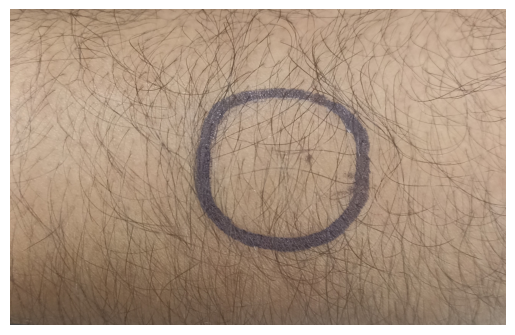

In [ ]:
# Leer la imagen
img = cv2.imread('/content/drive/MyDrive/Hipertermia ITM Carpeta Compartida/Segmentacion/04.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualización

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Convertir la imagen al espacio de color LAB
lab_img = color.rgb2lab(img_rgb)

# Extraer los canales AB y reformatear la imagen
ab = lab_img[:, :, 1:3]  # Tomar los canales A y B
ab = ab.reshape((-1, 2))  # Reformatear a 2D para aplicar K-means
ab = ab.astype(np.float64)

In [ ]:
# Aplicar K-means
num_clusters = 2  # Ajustar según sea necesario
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=3).fit(ab)
cluster_labels = kmeans.labels_

In [ ]:
# Reformatear los resultados al tamaño original de la imagen
n_rows, n_cols, _ = lab_img.shape
pixel_labels = cluster_labels.reshape((n_rows, n_cols))

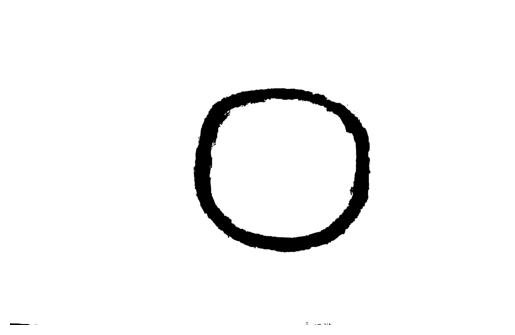

In [ ]:
# Crear una máscara para las regiones del clúster seleccionado
marker_cluster = 1  # Asumir que el clúster 1 es el área de interés
drawing_mask = (pixel_labels == marker_cluster)

plt.imshow(drawing_mask, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Eliminar objetos pequeños (ruido)
drawing_mask = cv2.morphologyEx(drawing_mask.astype(np.uint8), cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

# Rellenar agujeros
drawing_mask = cv2.morphologyEx(drawing_mask, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

# Suavizar la máscara (opcional)
selem = disk(3)
drawing_mask = opening(drawing_mask, selem)

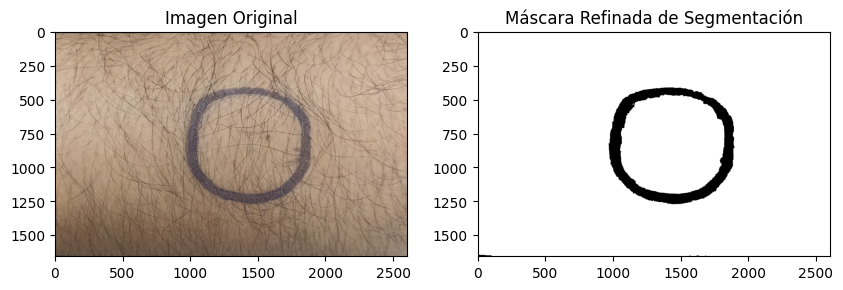

In [ ]:
# Mostrar la imagen original y la máscara final
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[0].set_title("Imagen Original")
ax[1].imshow(drawing_mask, cmap='gray')
ax[1].set_title("Máscara Refinada de Segmentación")
plt.show()

In [ ]:
# Encontrar componentes conectados
labeled_mask = label(drawing_mask)
regions = regionprops(labeled_mask)

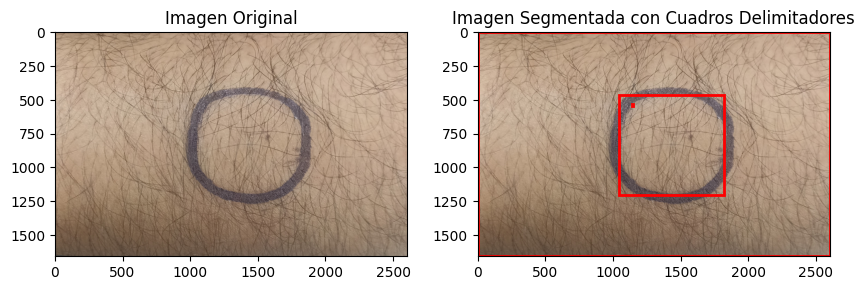

In [ ]:
# Dibujar cuadros delimitadores alrededor de las regiones detectadas
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].imshow(img_rgb)
ax[1].set_title("Imagen Segmentada con Cuadros Delimitadores")
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax[1].add_patch(rect)

# Aplicar la máscara a la imagen original
masked_image = img_rgb.copy()
masked_image[~drawing_mask] = 0

ax[0].imshow(img_rgb)
ax[0].set_title("Imagen Original")
plt.show()

In [ ]:
finish_time = time.time()
execution_time = finish_time - start_time
print("Tiempo de ejecución:", execution_time, "segundos")

Tiempo de ejecución: 12.69754433631897 segundos


Tiempo de ejecución: 24.909786224365234 segundos